<a href="https://colab.research.google.com/github/adib0073/Educative_SSDS_course/blob/main/notebooks/Text_Analytics_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLTK Text Analytics Tutorial for Beginners

In [44]:
# Importing required Python libraries
import os
from glob import glob
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = [10, 5]

### Downloading IMDB moview review dataset

In [4]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  13.3M      0  0:00:05  0:00:05 --:--:-- 17.0M


In [5]:
# Check if dataset is downloaded
!ls

aclImdb  aclImdb_v1.tar.gz  sample_data


In [6]:
!ls aclImdb/

imdbEr.txt  imdb.vocab	README	test  train


In [7]:
# Inspect folder structure of the training dataset
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


In [8]:
# Inspect folder structure of the test dataset
!ls aclImdb/test

labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt


### Inspecting the dataset

In [9]:
!cat aclImdb/train/pos/4012_8.txt

After some difficulty, Johnny Yuma arrives at his ailing uncle's ranch to take over day to day operations, only to find out that the old man has been murdered by his beautiful gold-digger wife and the woman's vicious brother.<br /><br />Good production values, a likable performance by Mark Damon, and a breezy action packed script combine to make this an entertaining, if not exceptionally deep, above average addition to the spaghetti western genre.<br /><br />Co-star Rosalba Neri is one of the hottest European babes ever to grace the screen. Here she's absolutely perfect as the cold-hearted user (and abuser) of weak men.<br /><br />Damon and Neri appeared together in at least one other picture, The Devil's Wedding Night, a pretty good horror movie that's of particular interest for those of you that want to see what's underneath Rosalba's dresses.

In [10]:
!cat aclImdb/train/neg/5003_4.txt

I'm embarrassed to be writing this review. I say that because those of you reading it will know that I sat through the whole thing and that is embarrassing to admit even to strangers. But I just had to warn those who read the viewer comments on IMDb before they watch a film not to watch this one. It's the least I can do. This is a bad movie! Trust me. The plot is goofy. The acting is amateurish. And the directing, camera work, sets, costumes, etc. are all second rate. Let it go.

In [11]:
# Analyzing the sample size of the dataset

train_path = "aclImdb/train"
test_path = "aclImdb/test"

print("====================Train Set====================")
print(f"We have: {len(os.listdir(train_path+'/pos'))} positive reviews.")
print(f"We have: {len(os.listdir(train_path+'/neg'))} negative reviews.")

print("====================Test Set====================")
print(f"We have: {len(os.listdir(test_path+'/pos'))} positive reviews.")
print(f"We have: {len(os.listdir(test_path+'/neg'))} negative reviews.")

====================Train Set====================
We have: 12500 positive reviews.
We have: 12500 negative reviews.
====================Test Set====================
We have: 12500 positive reviews.
We have: 12500 negative reviews.


In [12]:
# Loading data as a list
pos_files = glob(train_path + '/pos/*')
neg_files = glob(train_path + '/neg/*')

def read_txt(FilePath):
    with open(FilePath,'r') as fp:
        txt = fp.read()
    return txt

POS_TXTS = [read_txt(fp) for fp in pos_files]
NEG_TXTS = [read_txt(fp) for fp in neg_files]

In [13]:
len(pos_files),len(neg_files)

(12500, 12500)

In [14]:
# Converting list data as a dataframe
Datax = pd.DataFrame(list(zip(POS_TXTS, 
                     [1]*len(POS_TXTS))) + list(zip(NEG_TXTS,[0]*len(NEG_TXTS))) ,
                     columns =['text','target'])

In [15]:
# Let's take a glance of the text data dataframe
Datax.head()

,text,target
0,Scoop *** out of **** Woody Allen is definitel...,1
1,"This was the beginning of it all! Granted, thi...",1
2,"Walking with Cavemen, hosted by Alec Baldwin, ...",1
3,This is one of the best comedy ever ! The writ...,1
4,The Unseen is done in a style more like old Ho...,1


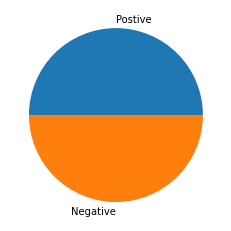

In [16]:
plt.pie(Datax['target'].value_counts(), labels = ['Postive', 'Negative'])
plt.show()

### Analyzing Statistics for Text Data

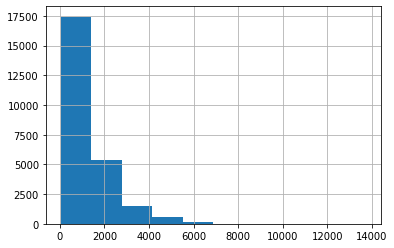

In [17]:
# Document Length Analysis for each document
Datax['text'].str.len().hist()


(array([1.7667e+04, 5.3270e+03, 1.3940e+03, 5.2400e+02, 7.3000e+01,
        8.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  10.,  256.,  502.,  748.,  994., 1240., 1486., 1732., 1978.,
        2224., 2470.]),
 <a list of 10 Patch objects>)

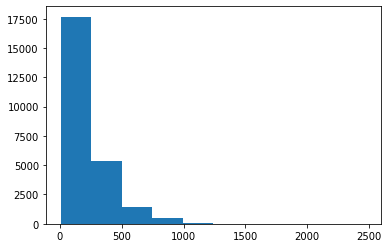

In [24]:
# Word Length Analysis for each sentence
num_words = []
for text in Datax['text'].values:
  num_words.append(len(text.split()))

plt.hist(np.array(num_words))

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 7.5000e+01, 5.3090e+03,
        1.6487e+04, 2.9770e+03, 1.4100e+02, 7.0000e+00, 2.0000e+00]),
 array([1.23986486, 1.86944981, 2.49903475, 3.12861969, 3.75820463,
        4.38778958, 5.01737452, 5.64695946, 6.2765444 , 6.90612934,
        7.53571429]),
 <a list of 10 Patch objects>)

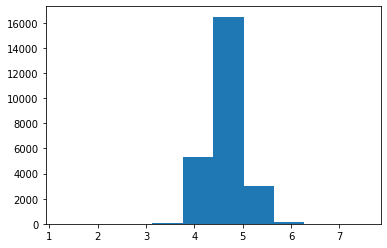

In [25]:
# Average word length for each sentence
avg_len_words = []
for text in Datax['text'].values:
  len_words = []
  for word in text.split():
    len_words.append(len(word))
  avg_len_words.append(np.mean(len_words))

plt.hist(np.array(avg_len_words))

### Category wise Analysis

In [27]:
# Analyzing words per positive and negative reviews separately
POS_WORDS = Datax[Datax.target==1].text.str.split().values.tolist()
NEG_WORDS = Datax[Datax.target==0].text.str.split().values.tolist()

POS_WORDS = [w for seq in POS_WORDS for w in seq]
NEG_WORDS = [w for seq in NEG_WORDS for w in seq]
print(f"No. of words in positive reviews: {len(POS_WORDS)} and negative reviews: {len(NEG_WORDS)}")

No. of words in positive reviews: 2958832 and negative reviews: 2885848


In [28]:
nltk.FreqDist(POS_WORDS).most_common(10)

[('the', 148414),
 ('and', 84276),
 ('a', 79428),
 ('of', 75341),
 ('to', 65209),
 ('is', 55358),
 ('in', 45796),
 ('that', 31943),
 ('I', 30928),
 ('it', 26991)]

In [29]:
nltk.FreqDist(NEG_WORDS).most_common(10)

[('the', 138618),
 ('a', 75668),
 ('and', 68388),
 ('of', 67631),
 ('to', 67359),
 ('is', 47871),
 ('in', 39784),
 ('I', 35045),
 ('that', 32617),
 ('this', 31177)]

In [30]:
POS_DIST = pd.DataFrame(nltk.FreqDist(POS_WORDS).items() ,columns = ['word','WordCount_pos'])
POS_DIST = POS_DIST.set_index('word')

NEG_DIST = pd.DataFrame(nltk.FreqDist(NEG_WORDS).items() ,columns = ['word','WordCount_neg'])
NEG_DIST = NEG_DIST.set_index('word')

In [31]:
COM_DIST = POS_DIST.join(NEG_DIST)
COM_DIST = COM_DIST.fillna(1)
COM_DIST = COM_DIST[(COM_DIST.WordCount_pos +COM_DIST.WordCount_neg)>50]
COM_DIST['ratio'] = np.log(COM_DIST.WordCount_pos/COM_DIST.WordCount_neg)

In [32]:
COM_DIST.sort_values(by='ratio',ascending=False).head(20)

,WordCount_pos,WordCount_neg,ratio
word,,,
Edie,82,1.0,4.406719
Gundam,74,1.0,4.304065
Paulie,67,1.0,4.204693
Antwone,58,1.0,4.060443
Sox,53,1.0,3.970292
Christy,66,2.0,3.496508
Gandhi,58,2.0,3.367296
Excellent,81,3.0,3.295837
Wang,52,2.0,3.258097


In [33]:
COM_DIST.sort_values(by='ratio',ascending=True).head(20)

,WordCount_pos,WordCount_neg,ratio
word,,,
Seagal,1,106.0,-4.663439
Boll,1,93.0,-4.532599
Uwe,1,92.0,-4.521789
4/10,1,76.0,-4.330733
Avoid,2,143.0,-4.269697
pathetic.,2,76.0,-3.637586
MST3K,3,101.0,-3.516508
WORST,2,66.0,-3.496508
3/10,3,75.0,-3.218876


### Word Cloud Visualization

In [36]:
wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = 'viridis', max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

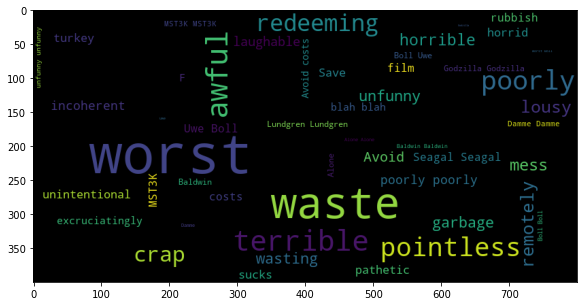

In [39]:
most_freq_neg = COM_DIST.sort_values(by='ratio',ascending=True).head(50).index

wordcloud.generate(' '.join([w for w in NEG_WORDS if w in most_freq_neg.tolist()]))
plt.imshow(wordcloud)

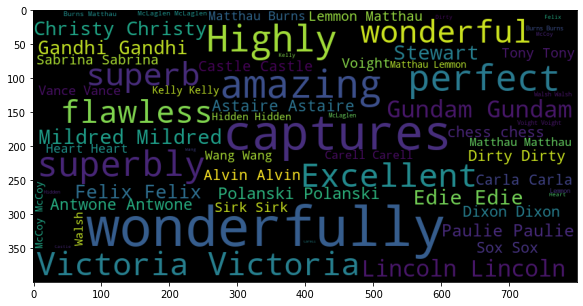

In [40]:
most_freq_pos = COM_DIST.sort_values(by='ratio',ascending=False).head(50).index

wordcloud.generate(' '.join([w for w in POS_WORDS if w in most_freq_pos.tolist()]))
plt.imshow(wordcloud)

### N-gram analysis

In [46]:
def generate_ngram(text_corpus, n=2):
    vectors = CountVectorizer(ngram_range=(n, n)).fit(text_corpus)
    bag_of_words = vectors.transform(text_corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, index]) for word, index in vectors.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

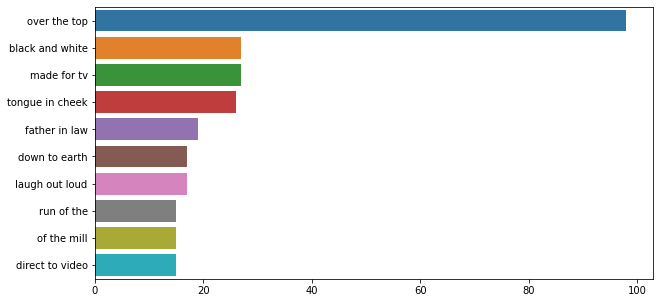

In [47]:
# Tri grams for positive reviews
tri_grams=generate_ngram(POS_WORDS,n=3)
x,y=map(list,zip(*tri_grams))
sns.barplot(x=y,y=x)

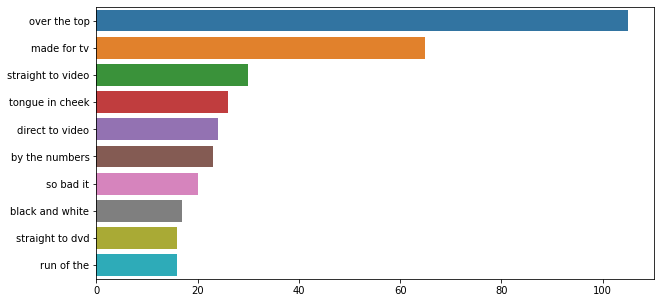

In [48]:
# Tri-grams for negative reviews
tri_grams=generate_ngram(NEG_WORDS,n=3)
x,y=map(list,zip(*tri_grams))
sns.barplot(x=y,y=x)